In [208]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [209]:
df=pd.read_csv('heart_2020_cleaned.csv')
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [210]:
#checking for null values in the dataset

df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [211]:
#checking top 5 rows of the dataset

df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [212]:
# checking names of all the columns in the dataset

df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [213]:
df.shape

#this shows 319K+ rows and 18 columns

(319795, 18)

In [214]:
# 4 numerical columns and rest all categorical

df.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

In [215]:
df.info

<bound method DataFrame.info of        HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0                No  16.60     Yes              No     No             3.0   
1                No  20.34      No              No    Yes             0.0   
2                No  26.58     Yes              No     No            20.0   
3                No  24.21      No              No     No             0.0   
4                No  23.71      No              No     No            28.0   
...             ...    ...     ...             ...    ...             ...   
319790          Yes  27.41     Yes              No     No             7.0   
319791           No  29.84     Yes              No     No             0.0   
319792           No  24.24      No              No     No             0.0   
319793           No  32.81      No              No     No             0.0   
319794           No  46.56      No              No     No             0.0   

        MentalHealth DiffWalking     Sex  A

Text(0.5, 1.0, 'Heatmap of Numerical Variables')

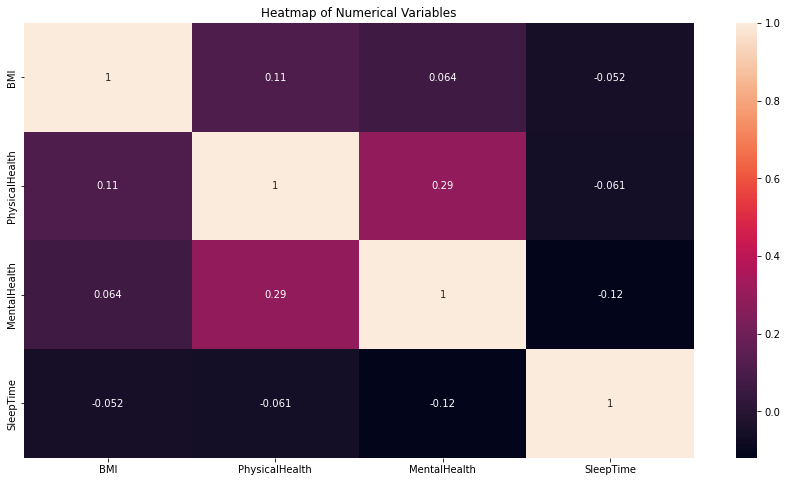

In [216]:
#correlation between all numerical columns

plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)
plt.title('Heatmap of Numerical Variables')

In [217]:
df.describe(include='number')

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


Text(0.5, 1.0, 'Boxplot of BMI')

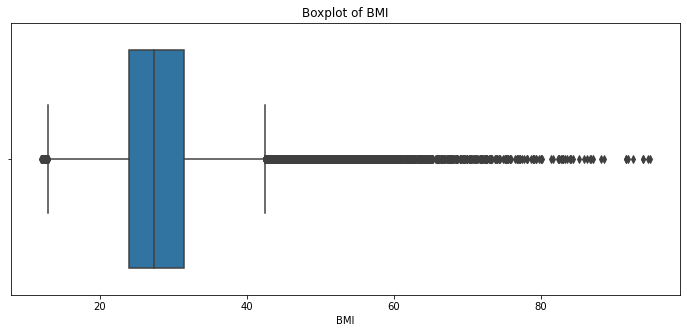

In [218]:
# plotting boxplot on numerical columns to see outliers

plt.figure(figsize=(12,5))
sns.boxplot(df['BMI'])
plt.title('Boxplot of BMI')

##### Outliers are visible on both sides 

Text(0.5, 1.0, 'Boxplot of Physical Health')

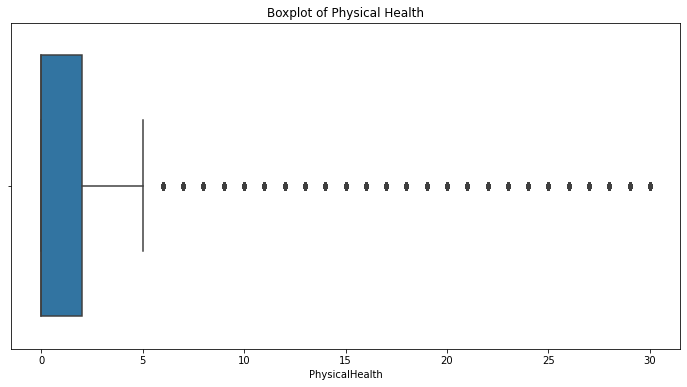

In [219]:
plt.figure(figsize=(12,6))
sns.boxplot(df['PhysicalHealth'])
plt.title('Boxplot of Physical Health')

##### Outliers visible on the right side (i.e. above the upper bound)

Text(0.5, 1.0, 'Boxplot of Mental Health')

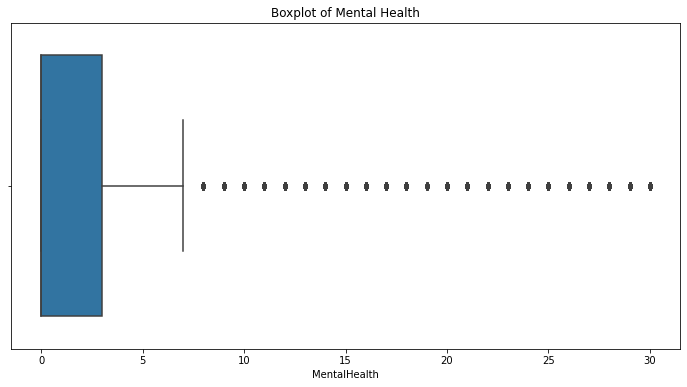

In [220]:
plt.figure(figsize=(12,6))
sns.boxplot(df['MentalHealth'])
plt.title('Boxplot of Mental Health')

##### Outliers visible on the right side

Text(0.5, 1.0, 'Boxplot of Sleep Time')

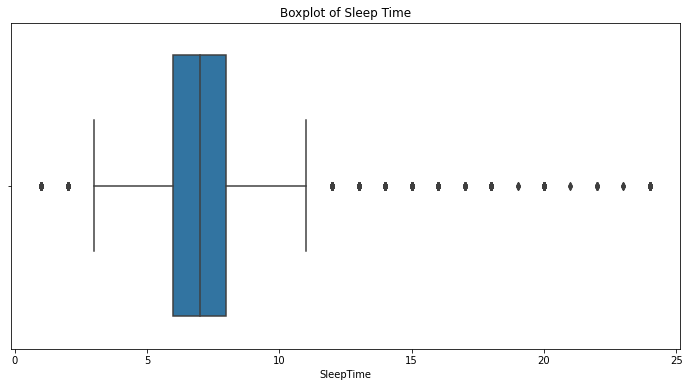

In [221]:
plt.figure(figsize=(12,6))
sns.boxplot(df['SleepTime'])
plt.title('Boxplot of Sleep Time')

##### Outliers on both right and left side

In [222]:
# As seen in all the plots above, outliers are evident in each and every one of them

# Hence we move forward to Data Preprocessing

In [223]:
# seperating the numerical columns first

df_num=df.select_dtypes(include='number')
df_num.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime
0,16.60,3.0,30.0,5.0
1,20.34,0.0,0.0,7.0
2,26.58,20.0,30.0,8.0
3,24.21,0.0,0.0,6.0
4,23.71,28.0,0.0,8.0


In [224]:
# calculating first and third quartiles and then calculating interqurtile range

Q1=df_num.quantile(0.25)
Q3=df_num.quantile(0.75)
IQR=Q3-Q1
lb=Q1-(1.5*IQR)
ub=Q3+(1.5*IQR)

In [225]:
print(f"lower bound for all the columns are:\n{lb}")

lower bound for all the columns are:
BMI               12.945
PhysicalHealth    -3.000
MentalHealth      -4.500
SleepTime          3.000
dtype: float64


In [226]:
print(f"upper bound for all the columns are:\n{ub}")

upper bound for all the columns are:
BMI               42.505
PhysicalHealth     5.000
MentalHealth       7.500
SleepTime         11.000
dtype: float64


In [227]:
df = df[~((df_num<lb)|(df_num>ub)).any(axis=1)]

In [228]:
df.shape

(231020, 18)

In [229]:
# previously we had 319K rows and it just got reduced to 231K

In [230]:
# plotting a boxplot to see how much outliers are still there (if any)

Text(0.5, 1.0, 'Boxplot of BMI')

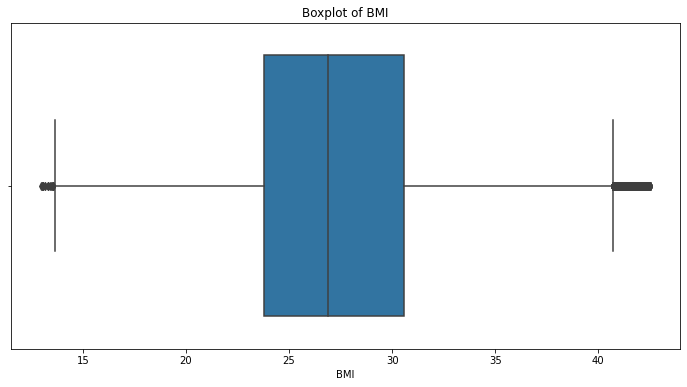

In [231]:
plt.figure(figsize=(12,6))
sns.boxplot(df['BMI'])
plt.title('Boxplot of BMI')

##### Compared to the previous boxplot, this one has improvised alot as the number of outliers have reduced drastically

Text(0.5, 1.0, 'Boxplot of Physical Health')

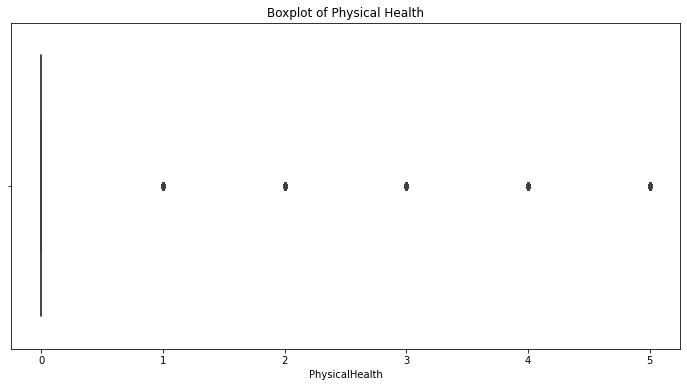

In [232]:
plt.figure(figsize=(12,6))
sns.boxplot(df['PhysicalHealth'])
plt.title('Boxplot of Physical Health')

<AxesSubplot:xlabel='MentalHealth'>

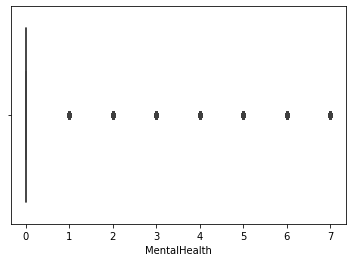

In [233]:
sns.boxplot(df['MentalHealth'])

Text(0.5, 1.0, 'Boxplot of Sleep Time')

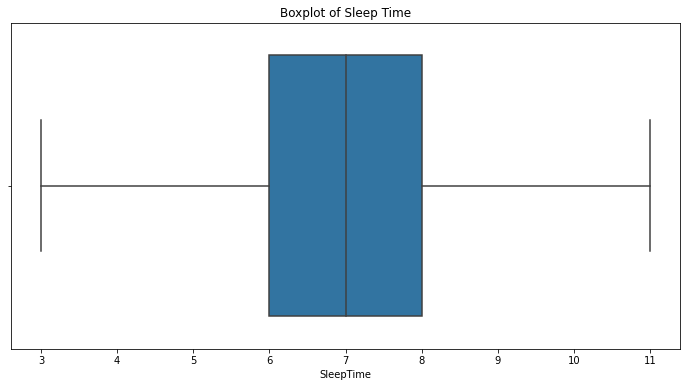

In [234]:
plt.figure(figsize=(12,6))
sns.boxplot(df['SleepTime'])
plt.title('Boxplot of Sleep Time')

### Exploratory Data Analysis of Categorical Columns

In [235]:
df.describe(include='object')

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
count,231020,231020,231020,231020,231020,231020,231020,231020,231020,231020,231020,231020,231020,231020
unique,2,2,2,2,2,2,13,6,4,2,5,2,2,2
top,No,No,No,No,No,Male,65-69,White,No,Yes,Very good,No,No,No
freq,215159,142839,216052,224702,213528,116391,25514,179011,200439,189597,92966,206534,224943,209190


In [236]:
# next we will plot countplot for all the binary columns having output as yes or no

<AxesSubplot:xlabel='AlcoholDrinking', ylabel='count'>

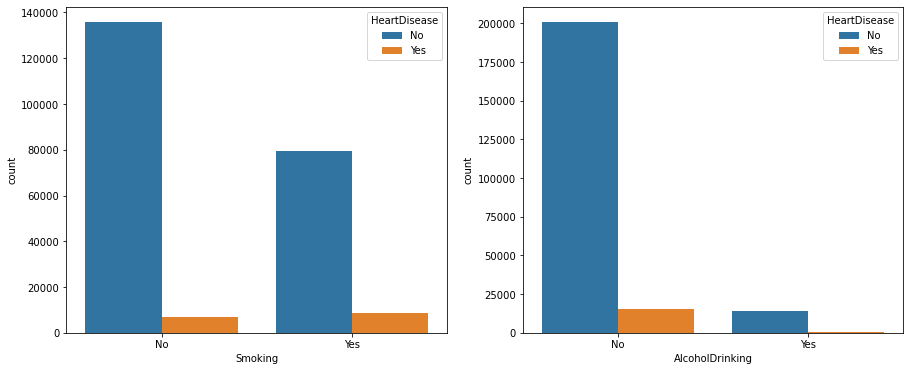

In [237]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot('Smoking',hue='HeartDisease',data=df)

# plt.figure(figsize=(10,5))
plt.subplot(1,2,2)
sns.countplot('AlcoholDrinking',hue='HeartDisease',data=df)

<AxesSubplot:xlabel='DiffWalking', ylabel='count'>

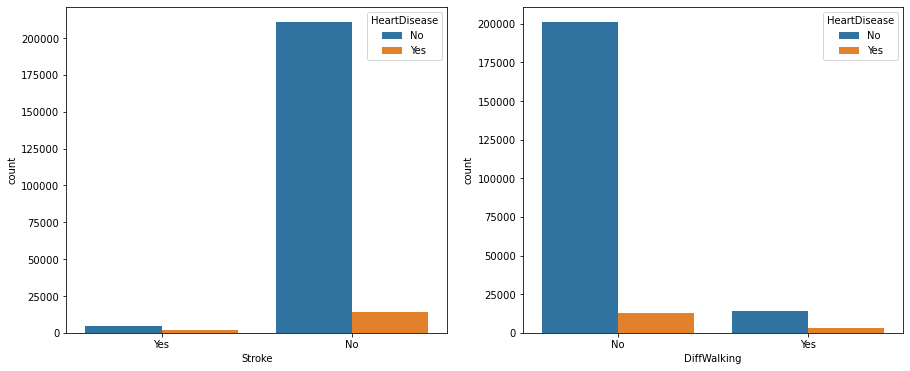

In [238]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot('Stroke',hue='HeartDisease',data=df)

plt.subplot(1,2,2)
sns.countplot('DiffWalking',hue='HeartDisease',data=df)

<AxesSubplot:xlabel='Diabetic', ylabel='count'>

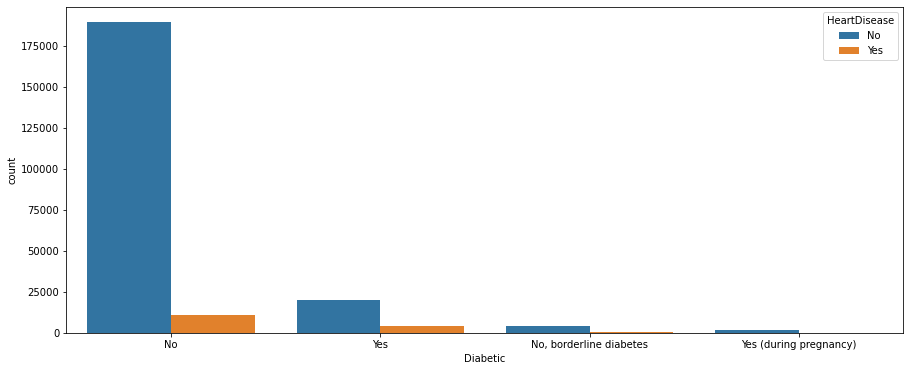

In [239]:
plt.figure(figsize=(15,6))
sns.countplot('Diabetic',hue='HeartDisease',data=df)

<AxesSubplot:xlabel='Race', ylabel='count'>

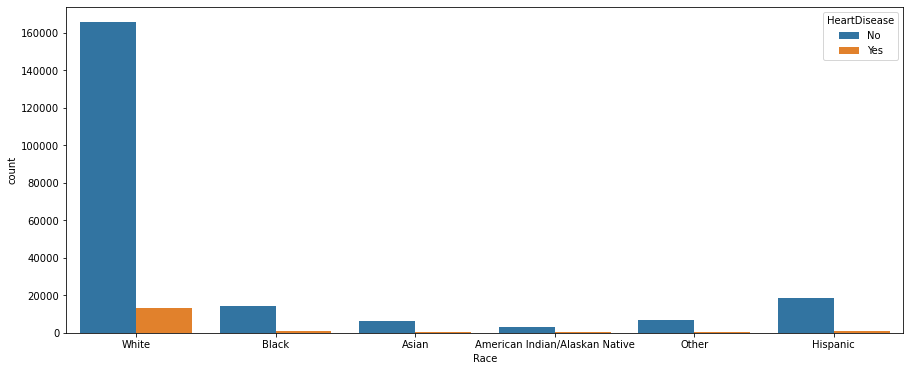

In [240]:
plt.figure(figsize=(15,6))
sns.countplot('Race',hue='HeartDisease',data=df)

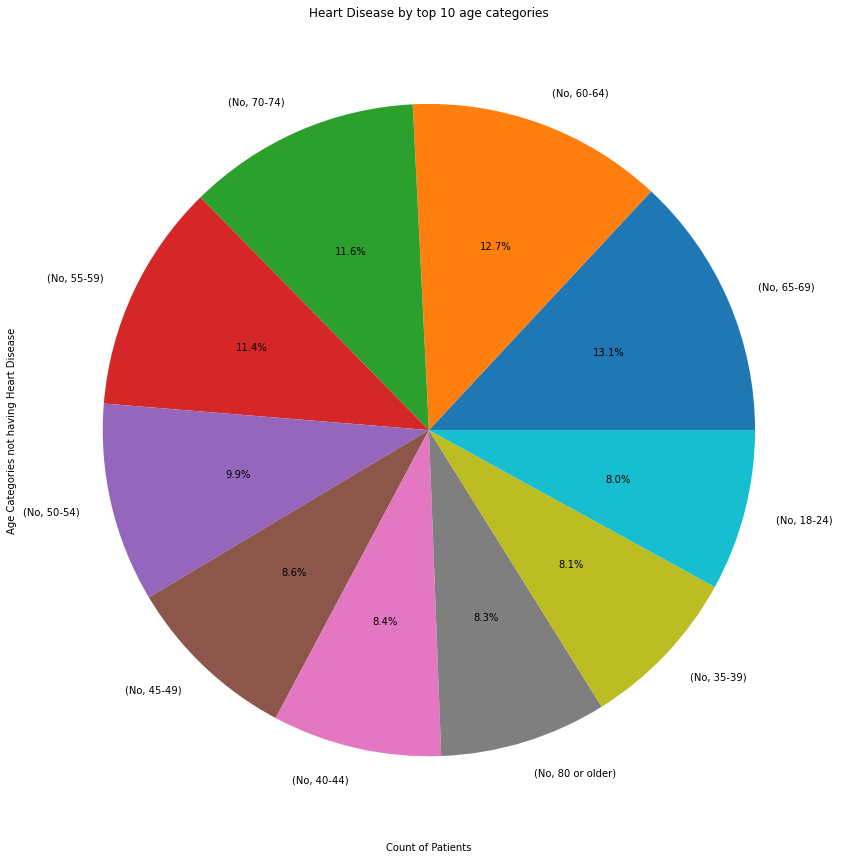

In [241]:
plt.figure(figsize=(15,15))
df.groupby('HeartDisease')['AgeCategory'].value_counts().nlargest(10).plot(kind='pie',autopct='%1.1f%%')
plt.title('Heart Disease by top 10 age categories')
plt.ylabel('Age Categories not having Heart Disease')
plt.xlabel('Count of Patients')
plt.show()

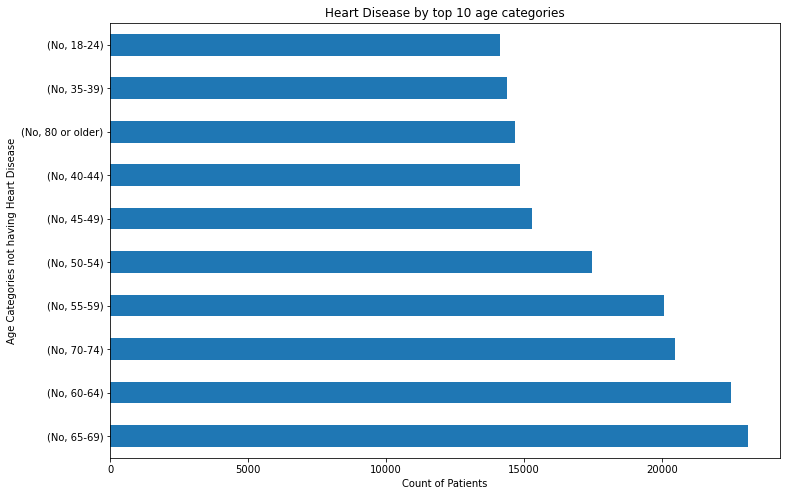

In [242]:
plt.figure(figsize=(12,8))
df.groupby('HeartDisease')['AgeCategory'].value_counts().nlargest(10).plot(kind='barh')
plt.title('Heart Disease by top 10 age categories')
plt.ylabel('Age Categories not having Heart Disease')
plt.xlabel('Count of Patients')
plt.show()

<AxesSubplot:ylabel='PhysicalActivity'>

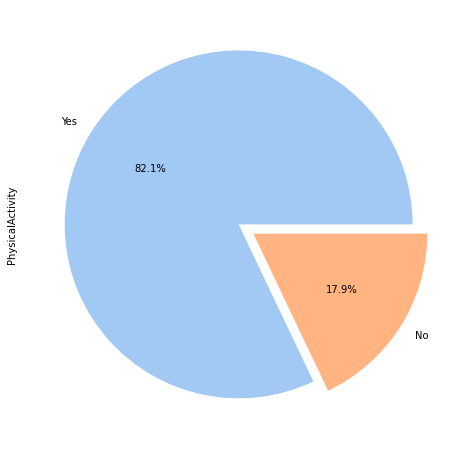

In [243]:
# plotting last few binary columns using pie chart

plt.figure(figsize=(12,8))
df['PhysicalActivity'].value_counts().plot(kind='pie',autopct='%1.1f%%',colors=sns.color_palette('pastel'),explode=[0,0.1])

##### Out of all the patients, 82% do regular physical activity

<AxesSubplot:ylabel='Asthma'>

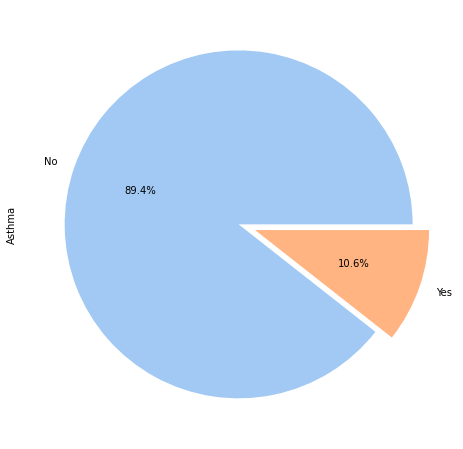

In [244]:
plt.figure(figsize=(12,8))
df['Asthma'].value_counts().plot(kind='pie',autopct='%1.1f%%',colors=sns.color_palette('pastel'),explode=[0,0.1])

##### Out of all the patients 89.4% have no history of Asthma

<AxesSubplot:ylabel='KidneyDisease'>

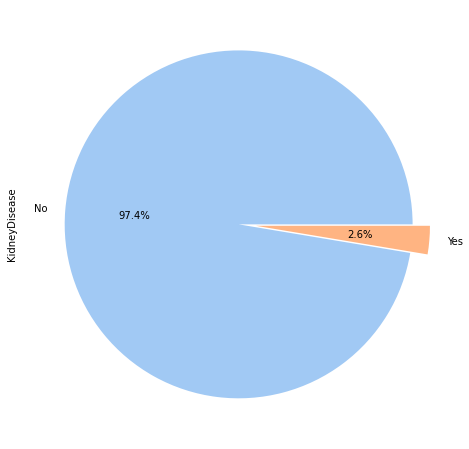

In [245]:
plt.figure(figsize=(12,8))
df['KidneyDisease'].value_counts().plot(kind='pie',autopct='%1.1f%%',colors=sns.color_palette('pastel'),explode=[0,0.1])

##### Out of all the patients, almost 97.4% dont have any Kidney disease

<AxesSubplot:ylabel='SkinCancer'>

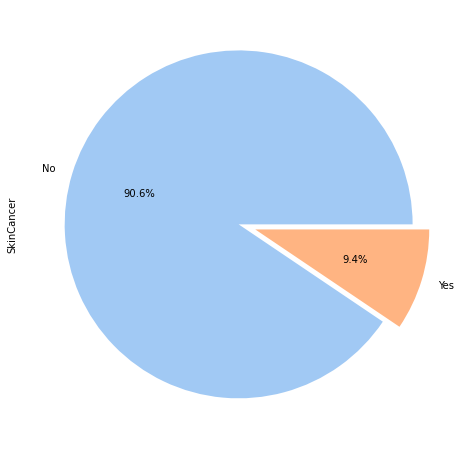

In [246]:
plt.figure(figsize=(12,8))
df['SkinCancer'].value_counts().plot(kind='pie',autopct='%1.1f%%',colors=sns.color_palette('pastel'),explode=[0,0.1])

##### Out of all the patients, 90.6% dont have Skin Cancer

### Exploratory Data Analysis of Numerical Columns

In [247]:
df.describe(include='number')

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,231020.000000,231020.000000,231020.000000,231020.000000
mean,27.498405,0.388265,0.755787,7.159748
std,5.032603,1.060739,1.641221,1.122396
min,12.970000,0.000000,0.000000,3.000000
25%,23.780000,0.000000,0.000000,6.000000
50%,26.880000,0.000000,0.000000,7.000000
75%,30.550000,0.000000,0.000000,8.000000
max,42.500000,5.000000,7.000000,11.000000


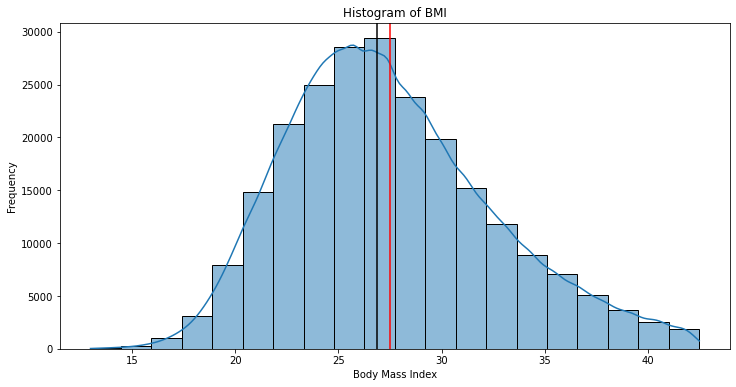

skewness of the graph is 0.509719686902701


In [248]:
plt.figure(figsize=(12,6))
sns.histplot(df['BMI'],bins=20,kde=True)
plt.title('Histogram of BMI')
plt.ylabel('Frequency')
plt.xlabel('Body Mass Index')
plt.axvline(df.BMI.mean(),color='red')
plt.axvline(df.BMI.median(),color='black')
plt.show()

print(f"skewness of the graph is {df.BMI.skew()}")

##### BMI is derived by mass and height of a person. It is given by body mass divided by the square of height.

In [249]:
x=pd.DataFrame({'BMI':['Less than 18.5','18.5 to 24.9','25 to 29.9','Above 30'],
               'Condition':['Underweight','Normal Weight','Over Weight','Obese']})
x

,BMI,Condition
0,Less than 18.5,Underweight
1,18.5 to 24.9,Normal Weight
2,25 to 29.9,Over Weight
3,Above 30,Obese


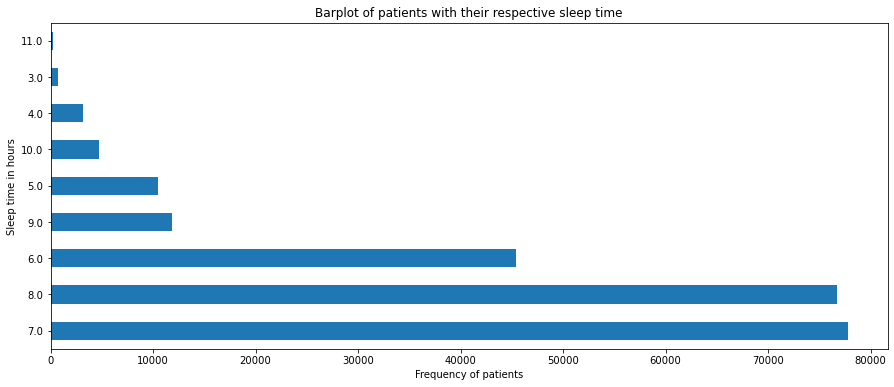

In [250]:
plt.figure(figsize=(15,6))
df['SleepTime'].value_counts().plot(kind='barh')
plt.title('Barplot of patients with their respective sleep time')
plt.xlabel('Frequency of patients')
plt.ylabel('Sleep time in hours')
plt.show()

##### Patients having sleep time of 6, 7 and 8 hours are less likely to have Heart Disease, whereas all others are more likely to have Heart problems due to lack of sleep or due to oversleeping in cases of those having sleep time of 10 and 11 hours

In [251]:
# seperating the target variable from the rest of the dataset

X=df.drop(columns='HeartDisease',axis=1)
y=df.HeartDisease

In [252]:
X.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
1,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
3,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
7,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No


In [253]:
# within X, seperating numerical and categorical columns

X_num = X.select_dtypes(include='number')
X_num.head(10)

,BMI,PhysicalHealth,MentalHealth,SleepTime
1,20.34,0.0,0.0,7.0
3,24.21,0.0,0.0,6.0
7,31.64,5.0,0.0,9.0
8,26.45,0.0,0.0,5.0
9,40.69,0.0,0.0,10.0
11,28.71,0.0,0.0,5.0
12,28.37,0.0,0.0,8.0
15,29.18,1.0,0.0,6.0
16,26.26,5.0,2.0,10.0
18,29.86,0.0,0.0,5.0


In [254]:
# Standardizing X_num using MinMaxscaler

ss=MinMaxScaler()

In [255]:
X_num_scaled = ss.fit_transform(X_num)

In [256]:
type(X_num_scaled)

numpy.ndarray

In [257]:
# to verify our results, we will transform X_num_scaled from numpy array to pandas dataframe

X_num_scaled=pd.DataFrame(X_num_scaled,columns=X_num.columns,index=X_num.index)

In [258]:
# here we can see, min=0 and max=1 for all columns

X_num_scaled.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,231020.000000,231020.000000,231020.00000,231020.000000
mean,0.491988,0.077653,0.10797,0.519969
std,0.170423,0.212148,0.23446,0.140300
min,0.000000,0.000000,0.00000,0.000000
25%,0.366068,0.000000,0.00000,0.375000
50%,0.471046,0.000000,0.00000,0.500000
75%,0.595327,0.000000,0.00000,0.625000
max,1.000000,1.000000,1.00000,1.000000


In [259]:
# now we will do One Hot Encoding on all the categorical columns

X_cat = X.select_dtypes(include='object')

In [260]:
# drop_first is used to avoid multicollinearity

X_cat_encoded = pd.get_dummies(X_cat,drop_first=False,dtype=int)

In [261]:
X_cat_encoded

,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,Stroke_No,Stroke_Yes,DiffWalking_No,DiffWalking_Yes,Sex_Female,Sex_Male,...,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes
1,1,0,1,0,0,1,1,0,1,0,...,0,0,0,1,1,0,1,0,1,0
3,1,0,1,0,1,0,1,0,1,0,...,0,1,0,0,1,0,1,0,0,1
7,0,1,1,0,1,0,0,1,1,0,...,0,1,0,0,0,1,1,0,1,0
8,1,0,1,0,1,0,1,0,1,0,...,1,0,0,0,1,0,0,1,1,0
9,1,0,1,0,1,0,0,1,0,1,...,0,1,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319786,0,1,1,0,1,0,1,0,1,0,...,0,0,0,1,0,1,1,0,1,0
319788,1,0,1,0,1,0,1,0,1,0,...,0,0,0,0,1,0,1,0,1,0
319789,1,0,1,0,1,0,1,0,1,0,...,0,0,0,0,1,0,1,0,1,0
319791,0,1,1,0,1,0,1,0,0,1,...,0,0,0,1,0,1,1,0,1,0


In [262]:
# conactenating standardized numerical columns and encoded categorical columns

X=pd.concat([X_num_scaled,X_cat_encoded],axis=1)
X.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,Stroke_No,Stroke_Yes,...,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes
1,0.249577,0.0,0.0,0.500,1,0,1,0,0,1,...,0,0,0,1,1,0,1,0,1,0
3,0.380630,0.0,0.0,0.375,1,0,1,0,1,0,...,0,1,0,0,1,0,1,0,0,1
7,0.632238,1.0,0.0,0.750,0,1,1,0,1,0,...,0,1,0,0,0,1,1,0,1,0
8,0.456485,0.0,0.0,0.250,1,0,1,0,1,0,...,1,0,0,0,1,0,0,1,1,0
9,0.938706,0.0,0.0,0.875,1,0,1,0,1,0,...,0,1,0,0,1,0,1,0,1,0


In [263]:
# label encoding y to convert it from categorical to binary

le = LabelEncoder()
y_encoded=le.fit_transform(y)

In [264]:
type(y_encoded)

numpy.ndarray

In [265]:
# converting y into dataframe

y=pd.DataFrame(y_encoded)
y.head()

,0
0,0
1,0
2,0
3,0
4,0


In [266]:
# train test split

# we will split the data into 75:25 ratio

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.75,random_state=42)

In [267]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(173265, 50)
(57755, 50)
(173265, 1)
(57755, 1)


### KNN Classifier

In [268]:
from sklearn.neighbors import KNeighborsClassifier

In [269]:
# setting random value for k as 5

clf=KNeighborsClassifier(n_neighbors=5)

In [272]:
# fitting the model on X_train and y_train

clf.fit(X_train,y_train)

KNeighborsClassifier()

In [274]:
# creating a new column in the dataframe and adding the values of p(y=1) in the columns for each row

X_train['prob'] = clf.predict_proba(X_train)[:,1]
X_train.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,Stroke_No,Stroke_Yes,...,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes,prob
73148,0.603454,0.0,1.0,0.500,0,1,1,0,1,0,...,0,0,1,1,0,1,0,1,0,0.0
311801,0.723332,0.0,0.0,0.625,0,1,1,0,0,1,...,1,0,0,1,0,1,0,1,0,0.6
152340,0.847951,0.0,0.0,0.500,1,0,1,0,1,0,...,0,0,0,1,0,1,0,1,0,0.0
55296,0.551642,0.0,0.0,0.500,1,0,1,0,1,0,...,0,0,1,1,0,1,0,1,0,0.4
5177,0.168303,0.0,0.0,0.500,0,1,1,0,1,0,...,0,0,1,1,0,1,0,1,0,0.0


In [275]:
# creating a new dataframe to store all the True/False and Positive/Negative values

df_roc = pd.DataFrame(columns=['Threshold','TP','TN','FP','FN','TPR','FPR'])
df_roc

,Threshold,TP,TN,FP,FN,TPR,FPR


In [276]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [283]:
# run a for loop which iterates through different thresholds starting from 0 upto 1 with steps of 0.1

for threshold in np.arange(0.0,1.1,0.05):
    y_pred=(X_train['prob']>threshold).astype(int)
    cm=confusion_matrix(y_train,y_pred)
    
    TP=cm[1,1]
    TN=cm[0,0]
    FP=cm[0,1]
    FN=cm[1,0]
    TPR=TP/(TP+FN)
    FPR=FP/(FP+TN)
    
    df_roc.loc[len(df_roc)]=pd.Series({
        'Threshold':threshold, 'TP':TP, 'TN':TN,
        'FP':FP, 'FN':FN,
        'TPR':TPR, 'FPR':FPR
    })
    
df_roc.head(20)

,Threshold,TP,TN,FP,FN,TPR,FPR
0,0.00,11861.0,132117.0,29284.0,3.0,0.999747,0.181436
1,0.05,11861.0,132117.0,29284.0,3.0,0.999747,0.181436
2,0.10,11861.0,132117.0,29284.0,3.0,0.999747,0.181436
3,0.15,11861.0,132117.0,29284.0,3.0,0.999747,0.181436
4,0.20,5988.0,154797.0,6604.0,5876.0,0.504720,0.040917
5,0.25,5988.0,154797.0,6604.0,5876.0,0.504720,0.040917
6,0.30,5988.0,154797.0,6604.0,5876.0,0.504720,0.040917
7,0.35,5988.0,154797.0,6604.0,5876.0,0.504720,0.040917
8,0.40,2270.0,160209.0,1192.0,9594.0,0.191335,0.007385
9,0.45,2270.0,160209.0,1192.0,9594.0,0.191335,0.007385


In [284]:
# calculate auc for plotting the roc curve

auc = roc_auc_score(y_train,X_train['prob'])

print(f"AUC is {auc:.2f}")

AUC is 0.94


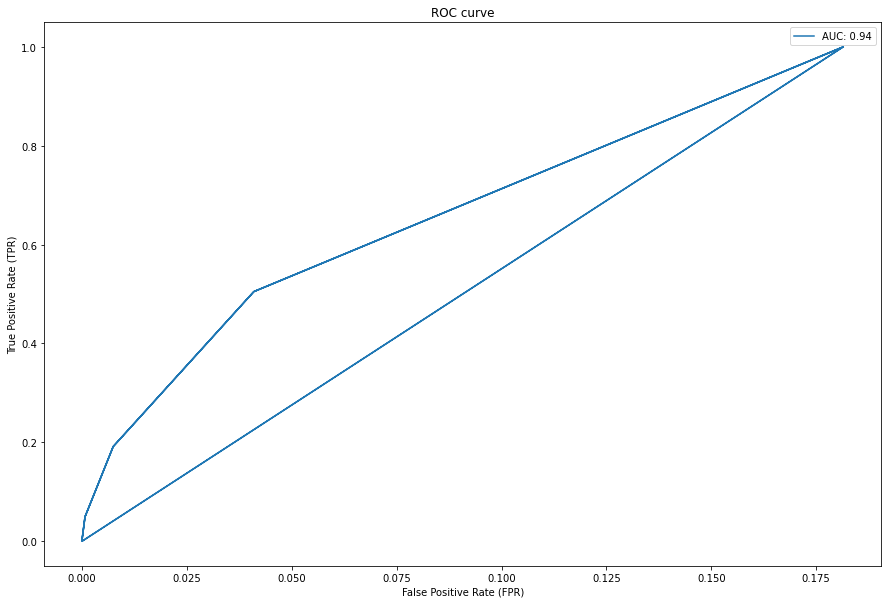

In [285]:
# plot the roc curve

plt.figure(figsize=(15,10))
plt.plot(df_roc['FPR'],df_roc['TPR'],label=f"AUC: {auc:.2f}")
plt.title('ROC curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.show()

In [324]:
# now we will calculate TPR - FPR and maximize it to find the best threshold

df_roc['TPR-FPR'] = df_roc['TPR'] - df_roc['FPR']

In [325]:
df_roc.head(20)

,Threshold,TP,TN,FP,FN,TPR,FPR,TPR-FPR
0,0.00,11861.0,132117.0,29284.0,3.0,0.999747,0.181436,0.818311
1,0.05,11861.0,132117.0,29284.0,3.0,0.999747,0.181436,0.818311
2,0.10,11861.0,132117.0,29284.0,3.0,0.999747,0.181436,0.818311
3,0.15,11861.0,132117.0,29284.0,3.0,0.999747,0.181436,0.818311
4,0.20,5988.0,154797.0,6604.0,5876.0,0.504720,0.040917,0.463803
5,0.25,5988.0,154797.0,6604.0,5876.0,0.504720,0.040917,0.463803
6,0.30,5988.0,154797.0,6604.0,5876.0,0.504720,0.040917,0.463803
7,0.35,5988.0,154797.0,6604.0,5876.0,0.504720,0.040917,0.463803
8,0.40,2270.0,160209.0,1192.0,9594.0,0.191335,0.007385,0.183950
9,0.45,2270.0,160209.0,1192.0,9594.0,0.191335,0.007385,0.183950


#### Selecting threshold value of 0.15 which is recommended by the formula of max(tpr-fpr)

In [326]:
# select max value of tpr - fpr

max_tpr_fpr_diff = df_roc['TPR-FPR'].max()

selected_threshold = df_roc[df_roc['TPR-FPR']==max_tpr_fpr_diff]['Threshold'].values[3]

print(f"best threshold is {selected_threshold}")

best threshold is 0.15000000000000002


In [327]:
# compute confusion matrix for this threshold

y_hat_selected_threshold = (X_train['prob']>selected_threshold).astype(int)

cm_max_diff = confusion_matrix(y_train,y_hat_selected_threshold)
cm_max_diff

array([[132117,  29284],
       [     3,  11861]], dtype=int64)

In [328]:
# creating a neat confusion matrix with labels

cm_df = pd.DataFrame(cm_max_diff,
                    columns=['Predicted Negative','Predicted Positive'],
                    index=['Actual Negative','Actual Positive'])

print(cm_df,sep='')

                 Predicted Negative  Predicted Positive
Actual Negative              132117               29284
Actual Positive                   3               11861


In [329]:
# compute metrics from confusion matrix

TN = cm_max_diff[0,0]
TP = cm_max_diff[1,1]
FP = cm_max_diff[0,1]
FN = cm_max_diff[1,0]

accuracy = (TP+TN)/(TP+TN+FP+FN)
misaccuracy = 1 - accuracy
recall = TP/(TP+FN)
precision = TP/(TP+FP)
f1_score = (2*precision*recall)/(precision+recall)

In [330]:
print(f"accuracy: {accuracy:.2f}")
print(f"misaccuracy: {misaccuracy:.2f}")
print(f"recall: {recall:.2f}")
print(f"precision: {precision:.2f}")
print(f"F1 score: {f1_score:.2f}")

accuracy: 0.83
misaccuracy: 0.17
recall: 1.00
precision: 0.29
F1 score: 0.45


#### Selecting the next best threshold value of 0.35 which we can see from the df_roc table above

In [331]:
selected_threshold_2 = 0.35

In [332]:
# compute confusion matrix for this threshold

y_hat_selected_threshold_2 = (X_train['prob']>selected_threshold_2).astype(int)

cm_max_diff = confusion_matrix(y_train,y_hat_selected_threshold_2)
cm_max_diff

array([[154797,   6604],
       [  5876,   5988]], dtype=int64)

In [333]:
# creating a neat confusion matrix with labels

cm_df = pd.DataFrame(cm_max_diff,
                    columns=['Predicted Negative','Predicted Positive'],
                    index=['Actual Negative','Actual Positive'])

print(cm_df,sep='')

                 Predicted Negative  Predicted Positive
Actual Negative              154797                6604
Actual Positive                5876                5988


In [334]:
# compute metrics from confusion matrix

TN = cm_max_diff[0,0]
TP = cm_max_diff[1,1]
FP = cm_max_diff[0,1]
FN = cm_max_diff[1,0]

accuracy_2 = (TP+TN)/(TP+TN+FP+FN)
misaccuracy_2 = 1 - accuracy
recall_2 = TP/(TP+FN)
precision_2 = TP/(TP+FP)
f1_score_2 = (2*precision*recall)/(precision+recall)

In [335]:
print(f"accuracy: {accuracy_2:.2f}")
print(f"misaccuracy: {misaccuracy_2:.2f}")
print(f"recall: {recall_2:.2f}")
print(f"precision: {precision_2:.2f}")
print(f"F1 score: {f1_score_2:.2f}")

accuracy: 0.93
misaccuracy: 0.17
recall: 0.50
precision: 0.48
F1 score: 0.45


In [336]:
pd.DataFrame({
    'Threshold':[selected_threshold,selected_threshold_2],
    'accuracy':[accuracy,accuracy_2],
    'recall':[recall,recall_2],
    'precision':[precision,precision_2],
    'F1 score':[f1_score,f1_score_2]
})

,Threshold,accuracy,recall,precision,F1 score
0,0.15,0.830970,0.999747,0.288273,0.447509
1,0.35,0.927972,0.504720,0.475540,0.447509


### Decision Tree Classifier

In [395]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [396]:
dtr = DecisionTreeClassifier(criterion='gini',max_depth=3)

In [397]:
model=dtr.fit(X_train,y_train)

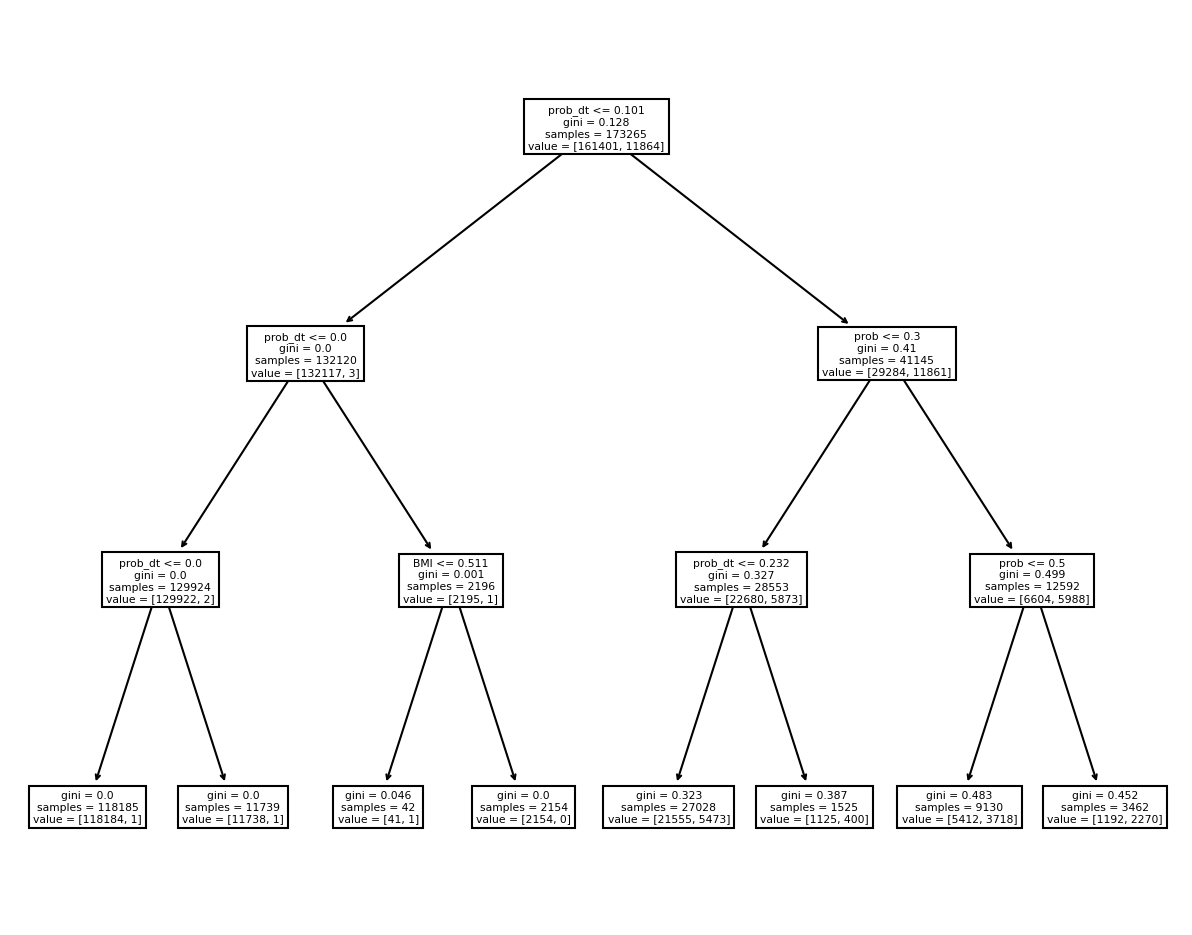

In [398]:
plt.figure(figsize=(10,8), dpi=150)
plot_tree(model, feature_names=X_train.columns);

In [399]:
# creating a new column in the dataframe and adding the values of p(y=1) in the columns for each row

X_train['prob_dt'] = dtr.predict_proba(X_train)[:,1]
X_train.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,Stroke_No,Stroke_Yes,...,GenHealth_Poor,GenHealth_Very good,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes,prob,prob_dt
73148,0.603454,0.0,1.0,0.500,0,1,1,0,1,0,...,0,1,1,0,1,0,1,0,0.0,0.000008
311801,0.723332,0.0,0.0,0.625,0,1,1,0,0,1,...,0,0,1,0,1,0,1,0,0.6,0.655690
152340,0.847951,0.0,0.0,0.500,1,0,1,0,1,0,...,0,0,1,0,1,0,1,0,0.0,0.000008
55296,0.551642,0.0,0.0,0.500,1,0,1,0,1,0,...,0,1,1,0,1,0,1,0,0.4,0.407229
5177,0.168303,0.0,0.0,0.500,0,1,1,0,1,0,...,0,1,1,0,1,0,1,0,0.0,0.000008


In [400]:
# creating a new dataframe to store all the True/False and Positive/Negative values

df_roc2 = pd.DataFrame(columns=['Threshold','TP','TN','FP','FN','TPR','FPR'])
df_roc2

,Threshold,TP,TN,FP,FN,TPR,FPR


In [401]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [402]:
# run a for loop which iterates through different thresholds starting from 0 upto 1 with steps of 0.1

for threshold in np.arange(0.0,1.1,0.05):
    y_pred=(X_train['prob_dt']>threshold).astype(int)
    cm=confusion_matrix(y_train,y_pred)
    
    TP=cm[1,1]
    TN=cm[0,0]
    FP=cm[0,1]
    FN=cm[1,0]
    TPR=TP/(TP+FN)
    FPR=FP/(FP+TN)
    
    df_roc2.loc[len(df_roc2)]=pd.Series({
        'Threshold':threshold, 'TP':TP, 'TN':TN,
        'FP':FP, 'FN':FN,
        'TPR':TPR, 'FPR':FPR
    })
    
df_roc2.head(20)

,Threshold,TP,TN,FP,FN,TPR,FPR
0,0.00,11864.0,2154.0,159247.0,0.0,1.000000,0.986654
1,0.05,11861.0,132117.0,29284.0,3.0,0.999747,0.181436
2,0.10,11861.0,132117.0,29284.0,3.0,0.999747,0.181436
3,0.15,11861.0,132117.0,29284.0,3.0,0.999747,0.181436
4,0.20,11861.0,132117.0,29284.0,3.0,0.999747,0.181436
5,0.25,6388.0,153672.0,7729.0,5476.0,0.538436,0.047887
6,0.30,5988.0,154797.0,6604.0,5876.0,0.504720,0.040917
7,0.35,5988.0,154797.0,6604.0,5876.0,0.504720,0.040917
8,0.40,5988.0,154797.0,6604.0,5876.0,0.504720,0.040917
9,0.45,2270.0,160209.0,1192.0,9594.0,0.191335,0.007385


In [403]:
# calculate auc for plotting the roc curve

auc = roc_auc_score(y_train,X_train['prob_dt'])

print(f"AUC is {auc:.2f}")

AUC is 0.94


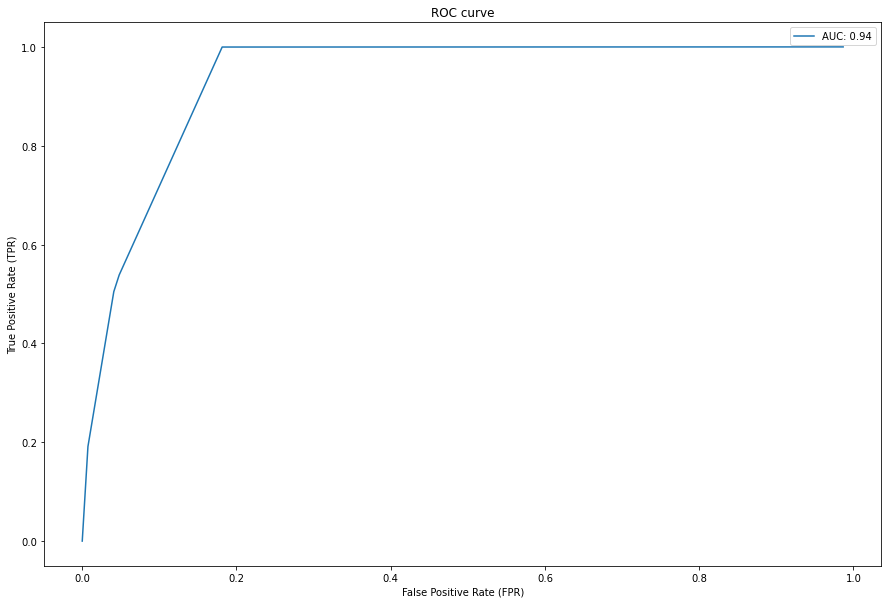

In [404]:
# plot the roc curve

plt.figure(figsize=(15,10))
plt.plot(df_roc2['FPR'],df_roc2['TPR'],label=f"AUC: {auc:.2f}")
plt.title('ROC curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.show()

In [405]:
# now we will calculate TPR - FPR and maximize it to find the best threshold

df_roc2['TPR-FPR'] = df_roc2['TPR'] - df_roc2['FPR']

In [406]:
df_roc2

,Threshold,TP,TN,FP,FN,TPR,FPR,TPR-FPR
0,0.00,11864.0,2154.0,159247.0,0.0,1.000000,0.986654,0.013346
1,0.05,11861.0,132117.0,29284.0,3.0,0.999747,0.181436,0.818311
2,0.10,11861.0,132117.0,29284.0,3.0,0.999747,0.181436,0.818311
3,0.15,11861.0,132117.0,29284.0,3.0,0.999747,0.181436,0.818311
4,0.20,11861.0,132117.0,29284.0,3.0,0.999747,0.181436,0.818311
5,0.25,6388.0,153672.0,7729.0,5476.0,0.538436,0.047887,0.490549
6,0.30,5988.0,154797.0,6604.0,5876.0,0.504720,0.040917,0.463803
7,0.35,5988.0,154797.0,6604.0,5876.0,0.504720,0.040917,0.463803
8,0.40,5988.0,154797.0,6604.0,5876.0,0.504720,0.040917,0.463803
9,0.45,2270.0,160209.0,1192.0,9594.0,0.191335,0.007385,0.183950


In [407]:
# select max value of tpr - fpr

max_tpr_fpr_diff_dt = df_roc2['TPR-FPR'].max()

selected_threshold_dt = df_roc2[df_roc2['TPR-FPR']==max_tpr_fpr_diff_dt]['Threshold'].values[3]

print(f"best threshold is {selected_threshold_dt}")

best threshold is 0.2


In [408]:
# compute confusion matrix for this threshold

y_hat_selected_threshold_dt = (X_train['prob_dt']>selected_threshold_dt).astype(int)

cm_max_diff_dt = confusion_matrix(y_train,y_hat_selected_threshold_dt)
cm_max_diff_dt

array([[132117,  29284],
       [     3,  11861]], dtype=int64)

In [409]:
# creating a neat confusion matrix with labels

cm_df_dt = pd.DataFrame(cm_max_diff_dt,
                    columns=['Predicted Negative','Predicted Positive'],
                    index=['Actual Negative','Actual Positive'])

print(cm_df_dt,sep='')

                 Predicted Negative  Predicted Positive
Actual Negative              132117               29284
Actual Positive                   3               11861


In [410]:
# compute metrics from confusion matrix

TN = cm_max_diff_dt[0,0]
TP = cm_max_diff_dt[1,1]
FP = cm_max_diff_dt[0,1]
FN = cm_max_diff_dt[1,0]

accuracy_dt = (TP+TN)/(TP+TN+FP+FN)
misaccuracy_dt = 1 - accuracy
recall_dt = TP/(TP+FN)
precision_dt = TP/(TP+FP)
f1_score_dt = (2*precision*recall)/(precision+recall)

In [411]:
print(f"accuracy: {accuracy_dt:.2f}")
print(f"misaccuracy: {misaccuracy_dt:.2f}")
print(f"recall: {recall_dt:.2f}")
print(f"precision: {precision_dt:.2f}")
print(f"F1 score: {f1_score_dt:.2f}")

accuracy: 0.83
misaccuracy: 0.17
recall: 1.00
precision: 0.29
F1 score: 0.45


#### Computing evaluation metrics at next best threshold

In [412]:
# compute confusion matrix for this threshold
selected_threshold_dt_2 =0.25
y_hat_selected_threshold_dt_2 = (X_train['prob_dt']>selected_threshold_dt_2).astype(int)

cm_max_diff_dt = confusion_matrix(y_train,y_hat_selected_threshold_dt_2)
cm_max_diff_dt

array([[153672,   7729],
       [  5476,   6388]], dtype=int64)

In [413]:
# creating a neat confusion matrix with labels

cm_df_dt = pd.DataFrame(cm_max_diff_dt,
                    columns=['Predicted Negative','Predicted Positive'],
                    index=['Actual Negative','Actual Positive'])

print(cm_df_dt,sep='')

                 Predicted Negative  Predicted Positive
Actual Negative              153672                7729
Actual Positive                5476                6388


In [414]:
# compute metrics from confusion matrix

TN = cm_max_diff_dt[0,0]
TP = cm_max_diff_dt[1,1]
FP = cm_max_diff_dt[0,1]
FN = cm_max_diff_dt[1,0]

accuracy_dt_2 = (TP+TN)/(TP+TN+FP+FN)
misaccuracy_dt_2 = 1 - accuracy
recall_dt_2 = TP/(TP+FN)
precision_dt_2 = TP/(TP+FP)
f1_score_dt_2 = (2*precision*recall)/(precision+recall)

In [415]:
print(f"accuracy: {accuracy_dt_2:.2f}")
print(f"misaccuracy: {misaccuracy_dt_2:.2f}")
print(f"recall: {recall_dt_2:.2f}")
print(f"precision: {precision_dt_2:.2f}")
print(f"F1 score: {f1_score_dt_2:.2f}")

accuracy: 0.92
misaccuracy: 0.17
recall: 0.54
precision: 0.45
F1 score: 0.45


In [416]:
pd.DataFrame({
    'Threshold':[selected_threshold_dt,selected_threshold_dt_2],
    'Accuracy':[accuracy_dt,accuracy_dt_2],
    'Recall':[recall_dt,recall_dt_2],
    'Precision':[precision_dt,precision_dt_2],
    'F1 score':[f1_score_dt,f1_score_dt_2]
})

,Threshold,Accuracy,Recall,Precision,F1 score
0,0.20,0.830970,0.999747,0.288273,0.447509
1,0.25,0.923787,0.538436,0.452504,0.447509
